In [31]:
import re
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 14)

In [42]:
train = {
    "lr": [],
    "rec_loss": [],
    "emb_loss": [],
    "loss": [],
    "perplexity": []
}

eval = {
    "psnr": [],
    "ssim": []
}

with open("train_3.out", "r", encoding="utf-8") as f:
    for line in f.readlines():
        pattern_train = r"Averaged stats: lr: (?P<lr>[-+]?\d+(?:\.\d*)?)  rec_loss: ([-+]?\d+(?:\.\d*)?) \((?P<rec_loss>[-+]?\d+(?:\.\d*)?)\)  emb_loss: ([-+]?\d+(?:\.\d*)?) \((?P<emb_loss>[-+]?\d+(?:\.\d*)?)\)  loss: ([-+]?\d+(?:\.\d*)?) \((?P<loss>[-+]?\d+(?:\.\d*)?)\)  perplexity: ([-+]?\d+(?:\.\d*)?) \((?P<perplexity>[-+]?\d+(?:\.\d*)?)\)"
        mch = re.match(pattern_train, line)
        if mch is not None:
            for key in train.keys(): train[key].append(float(mch.group(key)))
        
        pattern_eval = r"\* PSNR (?P<psnr>[-+]?\d+(?:\.\d*)?) SSIM (?P<ssim>[-+]?\d+(?:\.\d*)?)"
        mch = re.match(pattern_eval, line)
        if mch is not None:
            for key in eval.keys(): eval[key].append(float(mch.group(key)))

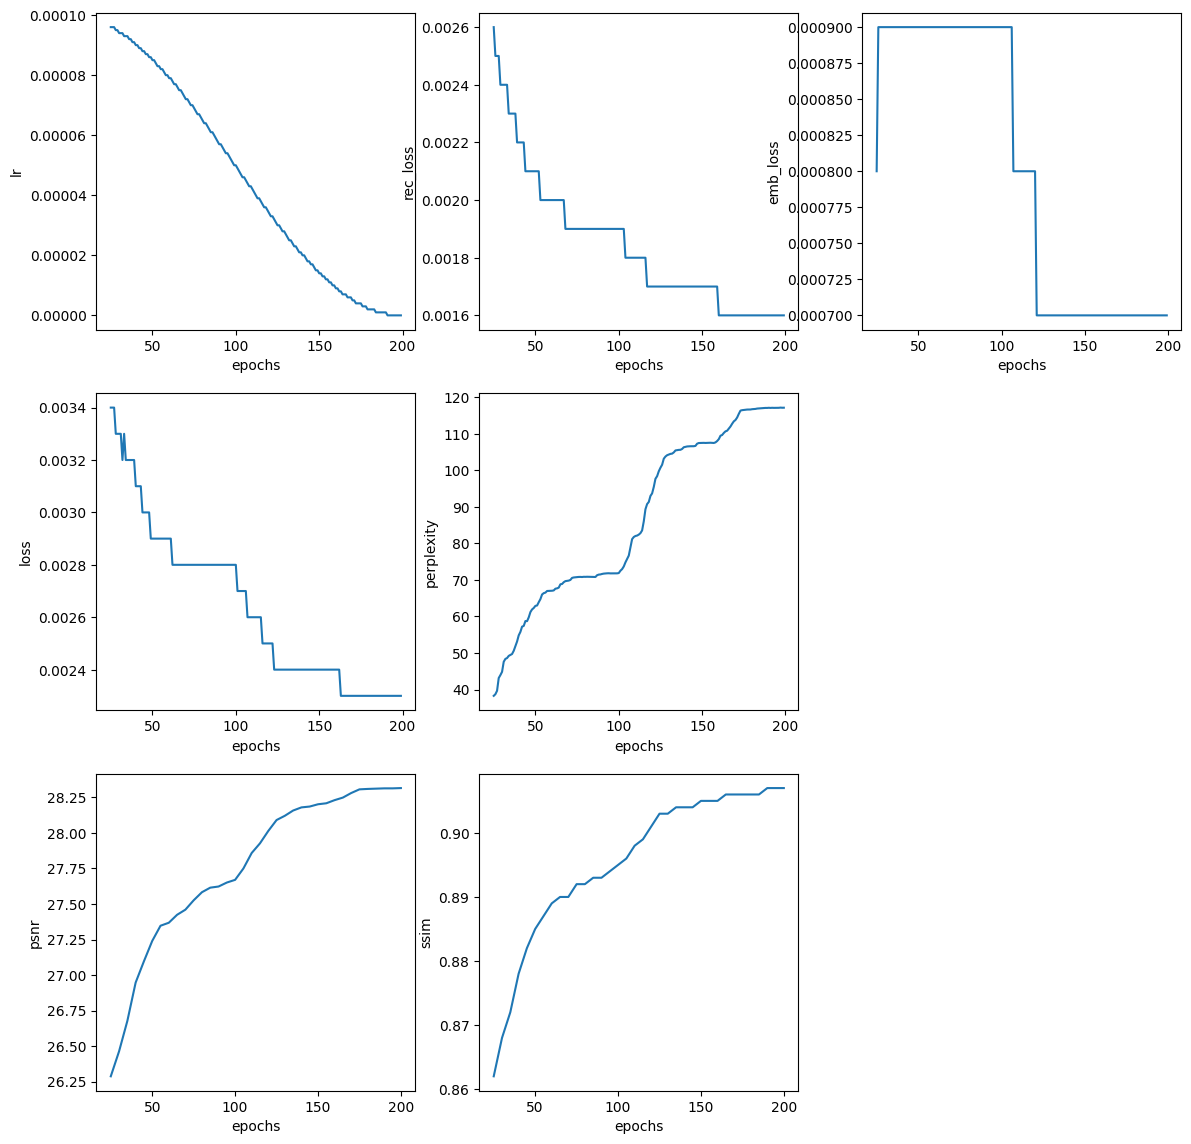

In [43]:
for i, key in enumerate(train.keys()):
    plt.subplot(3, 3, i+1)
    plt.xlabel("epochs")
    plt.ylabel(key)
    plt.plot(np.arange(len(train[key][25:])) + 25, train[key][25:])
for i, key in enumerate(eval.keys()):
    plt.subplot(3, 3, i+7)
    plt.xlabel("epochs")
    plt.ylabel(key)
    plt.plot(np.arange(5, len(eval[key]))*5, eval[key][5:])
plt.show()